# 重回帰モデルの作成

気温と曜日から販売数を予測するモデルを作成する

## 対象データ

ここではSIGNATEの[【練習問題】お弁当の需要予測データ](https://signate.jp/competitions/24/data)を使用している

### train.csv（学習データ）

* 説明変数：week, temperature
* 目的変数：y

### test.csv（評価データ）

* 説明変数：week, temperature

## 重回帰モデルの概要

* 2つ以上の目的変数を使った回帰モデル
* **y = ax1 + bx2 + cx3 + …** の数式で表すことができる

## データの準備

ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression as LR

CSVデータの読み込み

In [2]:
train = pd.read_csv('data/demand_forcast/train.csv')
test = pd.read_csv('data/demand_forcast/test.csv')
sample = pd.read_csv('data/demand_forcast/sample.csv', header=None)

## ダミー変数化

質的データの列をダミー変数化する

In [3]:
pd.get_dummies(train['week'])

,月,木,水,火,金
0,True,False,False,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,True,False,False,False
4,False,False,False,False,True
...,...,...,...,...,...
202,False,False,True,False,False
203,False,True,False,False,False
204,False,False,False,False,True
205,True,False,False,False,False


## 説明変数と目的変数の設定

学習データから説明変数を抽出する

In [4]:
trainX = pd.get_dummies(train[['week', 'temperature']])

学習データから目的変数を抽出する

In [5]:
y = train['y']

評価データから説明変数を抽出する

In [6]:
testX = pd.get_dummies(test[['week', 'temperature']])

## モデルの準備

### モデルを表す変数を用意する

In [7]:
model = LR()

## モデルの作成

### fit関数でモデルを作成する

説明変数、目的変数の順に指定

In [8]:
model.fit(trainX, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


モデルの傾きを確認する

In [9]:
model.coef_

array([-2.53878074,  8.26339936, -9.47240196, -2.02873774,  1.85251984,
        1.38522051])

モデルの切片を確認する

In [10]:
model.intercept_

np.float64(135.69119841401601)

## モデルを使った予測

### predict関数での予測

In [11]:
model.predict(testX)

array([ 82.37908978,  65.54193684,  64.21341177,  89.37081192,
        81.43666396,  74.5088695 ,  69.09622987,  70.81424168,
        69.5043945 ,  94.05748117,  78.99747474,  78.68446197,
        83.27773815,  86.26034736,  94.31135925,  88.89871962,
        89.60121914,  86.32427504,  89.05300617,  83.90235823,
        76.45869401,  89.34734106,  89.56076232,  93.04196888,
        77.4742063 ,  86.0469261 ,  90.13244614, 100.22364142,
        97.10401806,  76.71257208,  96.96368327, 107.65003323,
        96.66934838,  95.83462769,  99.56159871,  99.24858594,
       108.60161785, 110.30567789,  87.88320732,  98.23307364])

predict関数を使った予測結果を変数に代入する

In [12]:
pred = model.predict(testX)

## モデルの評価

### SIGNATEで評価する形式にデータを加工する

sampleファイルのカラム[1]に、予測結果を代入する

In [13]:
sample.head()

,0,1
0,2014-10-1,24
1,2014-10-2,71
2,2014-10-3,25
3,2014-10-6,32
4,2014-10-7,60


In [14]:
sample[1] = pred

In [15]:
sample.head()

,0,1
0,2014-10-1,82.379090
1,2014-10-2,65.541937
2,2014-10-3,64.213412
3,2014-10-6,89.370812
4,2014-10-7,81.436664


sampleをCSVファイルに書き出す

In [16]:
sample.to_csv('data/demand_forcast/output_submit2.csv', index=False, header=False)

元のデータと予測値をグラフで比較する

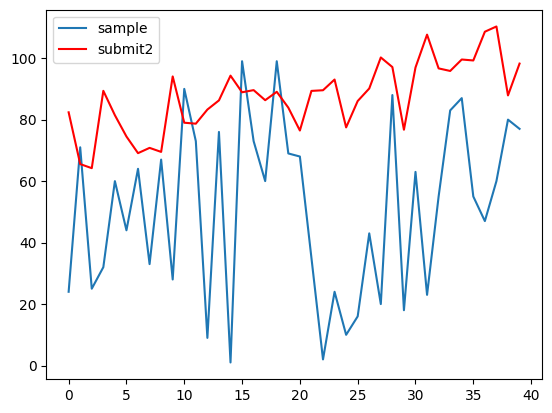

In [17]:
pd.read_csv('data/demand_forcast/sample.csv', header=None)[1].plot(label='sample')
pd.read_csv('data/demand_forcast/output_submit2.csv', header=None)[1].plot(label='submit2', color='red')
plt.legend()


書き出したファイルを[SIGNATE](https://signate.jp/competitions/24/data)に投稿して評価を確認する